#Quiz #13
This notebook is created by Chinchuthakun Worameth as a part of Complex Network (ART.T462) at Tokyo Institute of Technology taught in Fall semester 2021 by Prof. Murata Tsuyoshi. It demonstrates two-dimensional embedding of Zachary's karate club network

cf. 
gensim: Word2vec embeddings
https://radimrehurek.com/gensim/models/word2vec.html

a blog of DeepWalk (written in Japanese)
https://netres-bigdata.hatenablog.com/entry/2018/07/06/042240

## 1. Two-dimensional embedding with Deepwalk (#1)

In [1]:
# embedding of Zachary's karate club network (updated)
import networkx as nx
import matplotlib.pyplot as plt
import random
from gensim.models import Word2Vec as word2vec

In [2]:
def make_random_walks(G, num_of_walk, length_of_walk):
  walks = list()
  for i in range(num_of_walk):
    node_list = list(G.nodes())
    for node in node_list:
      current_node = node
      walk = list()
      walk.append(str(node))
      for j in range(length_of_walk):
        random.seed() ### inserted
        next_node = random.choice(list(G.neighbors(current_node)))
        walk.append(str(next_node))
        current_node = next_node ### updated
      walks.append(walk)
  return walks

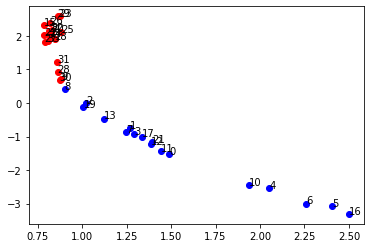

In [3]:
G = nx.karate_club_graph()
walks = make_random_walks(G, 100, 20)
model = word2vec(walks, min_count=0, size=2, window=5, workers=1)

x = list()
y = list()
node_list = list()
colors = list()
fig, ax = plt.subplots()
for node in G.nodes():
  vector = model.wv[str(node)]
  x.append(vector[0])
  y.append(vector[1])
  ax.annotate(str(node), (vector[0], vector[1]))
  if G.nodes[node]["club"] == "Officer":
    colors.append("r")
  else:
    colors.append("b")
for i in range(len(x)):
  ax.scatter(x[i], y[i], c=colors[i])
plt.show()

## 2. Model prediction (#2)

Now, we will predict top five pairs of nodes that
are likely be connected based on $k$ - dimensional embedding and check whether the predictions are correct. For this subtask, we will use $k=10$.

In [4]:
A = nx.adjacency_matrix(G).todense()

In [5]:
model = word2vec(walks, min_count=0, size=10, window=5, workers=1)

In [6]:
A = nx.adjacency_matrix(G).todense()
for i in range(G.number_of_nodes()):
  top_connect = model.predict_output_word(walks[i], topn=5)
  print(f"Node {i}: {[x[0] for x in top_connect]}\t p = {[round(x[1],3) for x in top_connect]} \
  -----> {[int(A[i,int(x[0])-1]) for x in top_connect]}")

Node 0: ['9', '22', '15', '14', '18']	 p = [0.051, 0.047, 0.046, 0.046, 0.043]   -----> [1, 1, 0, 1, 1]
Node 1: ['22', '15', '14', '18', '26']	 p = [0.069, 0.068, 0.063, 0.06, 0.058]   -----> [1, 0, 1, 1, 0]
Node 2: ['22', '15', '14', '26', '18']	 p = [0.06, 0.058, 0.056, 0.055, 0.051]   -----> [0, 0, 1, 0, 0]
Node 3: ['12', '21', '17', '11', '19']	 p = [0.057, 0.055, 0.051, 0.048, 0.048]   -----> [0, 0, 0, 0, 0]
Node 4: ['16', '4', '6', '5', '10']	 p = [0.202, 0.144, 0.117, 0.115, 0.1]   -----> [0, 0, 0, 0, 0]
Node 5: ['9', '19', '11', '22', '14']	 p = [0.044, 0.042, 0.042, 0.04, 0.039]   -----> [0, 0, 1, 0, 0]
Node 6: ['16', '4', '6', '5', '10']	 p = [0.233, 0.152, 0.129, 0.124, 0.102]   -----> [0, 0, 1, 1, 0]
Node 7: ['15', '22', '14', '26', '9']	 p = [0.058, 0.056, 0.055, 0.053, 0.052]   -----> [0, 0, 0, 0, 0]
Node 8: ['15', '26', '22', '14', '20']	 p = [0.067, 0.066, 0.064, 0.062, 0.056]   -----> [0, 0, 0, 0, 0]
Node 9: ['25', '24', '15', '26', '14']	 p = [0.056, 0.054, 0.052, 0.0